**Import Libraries and Data**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_excel('labeling_data.xlsx')
df = df.set_index('index')
df['date'] = pd.to_datetime(df['date'])

**Label the data**

Label wheter each text belongs to a new conversation or not, by comparing *conversation_id* of previous messages.

In [41]:
seen_conversations = set()

labels = []

for i, row in df.iterrows():
    conversation_id = row['conversation_id']

    if conversation_id in seen_conversations:
        labels.append('no')
    else:
        labels.append('yes')
        seen_conversations.add(conversation_id)

df['new_conversation'] = labels


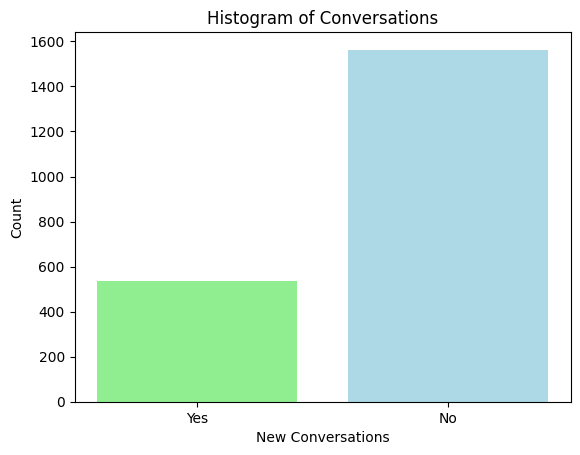

In [42]:
yes_count = (df['new_conversation'] == 'yes').sum()
no_count = (df['new_conversation'] == 'no').sum()

plt.bar(['Yes', 'No'], [yes_count, no_count], color = ['lightgreen', 'lightblue'])

plt.xlabel('New Conversations')
plt.ylabel('Count')
plt.title('Histogram of Conversations')

plt.show()


**Drif Analyis**

For each Telegram group considered in the analysis, display the scatterplot representing wheter a message, in a given data, belongs to a new conversation. 

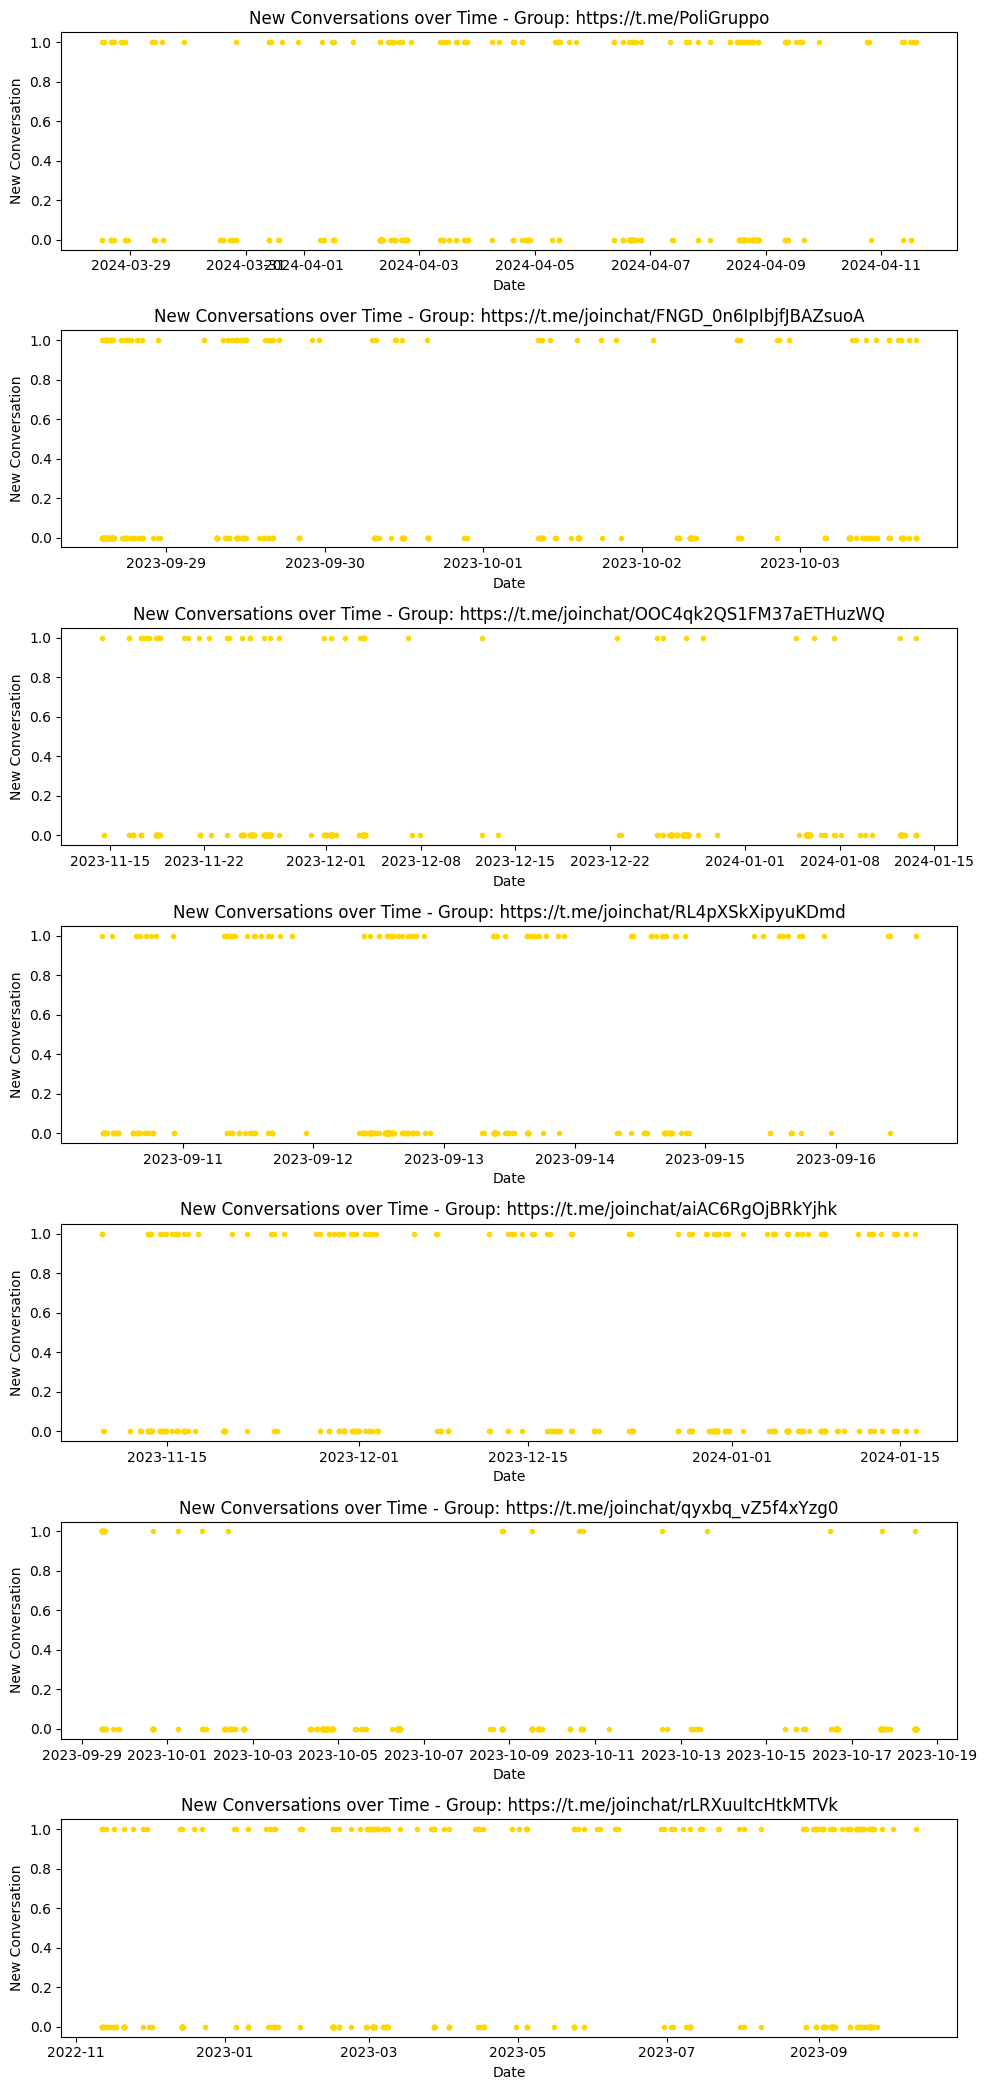

In [43]:
grouped = df.groupby('group')
num_plots = len(grouped)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 3*num_plots))

for i, (group, group_data) in enumerate(grouped):
    new_conversation = group_data['new_conversation'] == 'yes'
    axes[i].scatter(group_data['date'], new_conversation, marker='.', color = '#FFD700')

    axes[i].set_title(f'New Conversations over Time - Group: {group}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('New Conversation')

plt.tight_layout()
plt.show()


Drifts, for each Telegram group, are highlighted by adding a vertical black line.

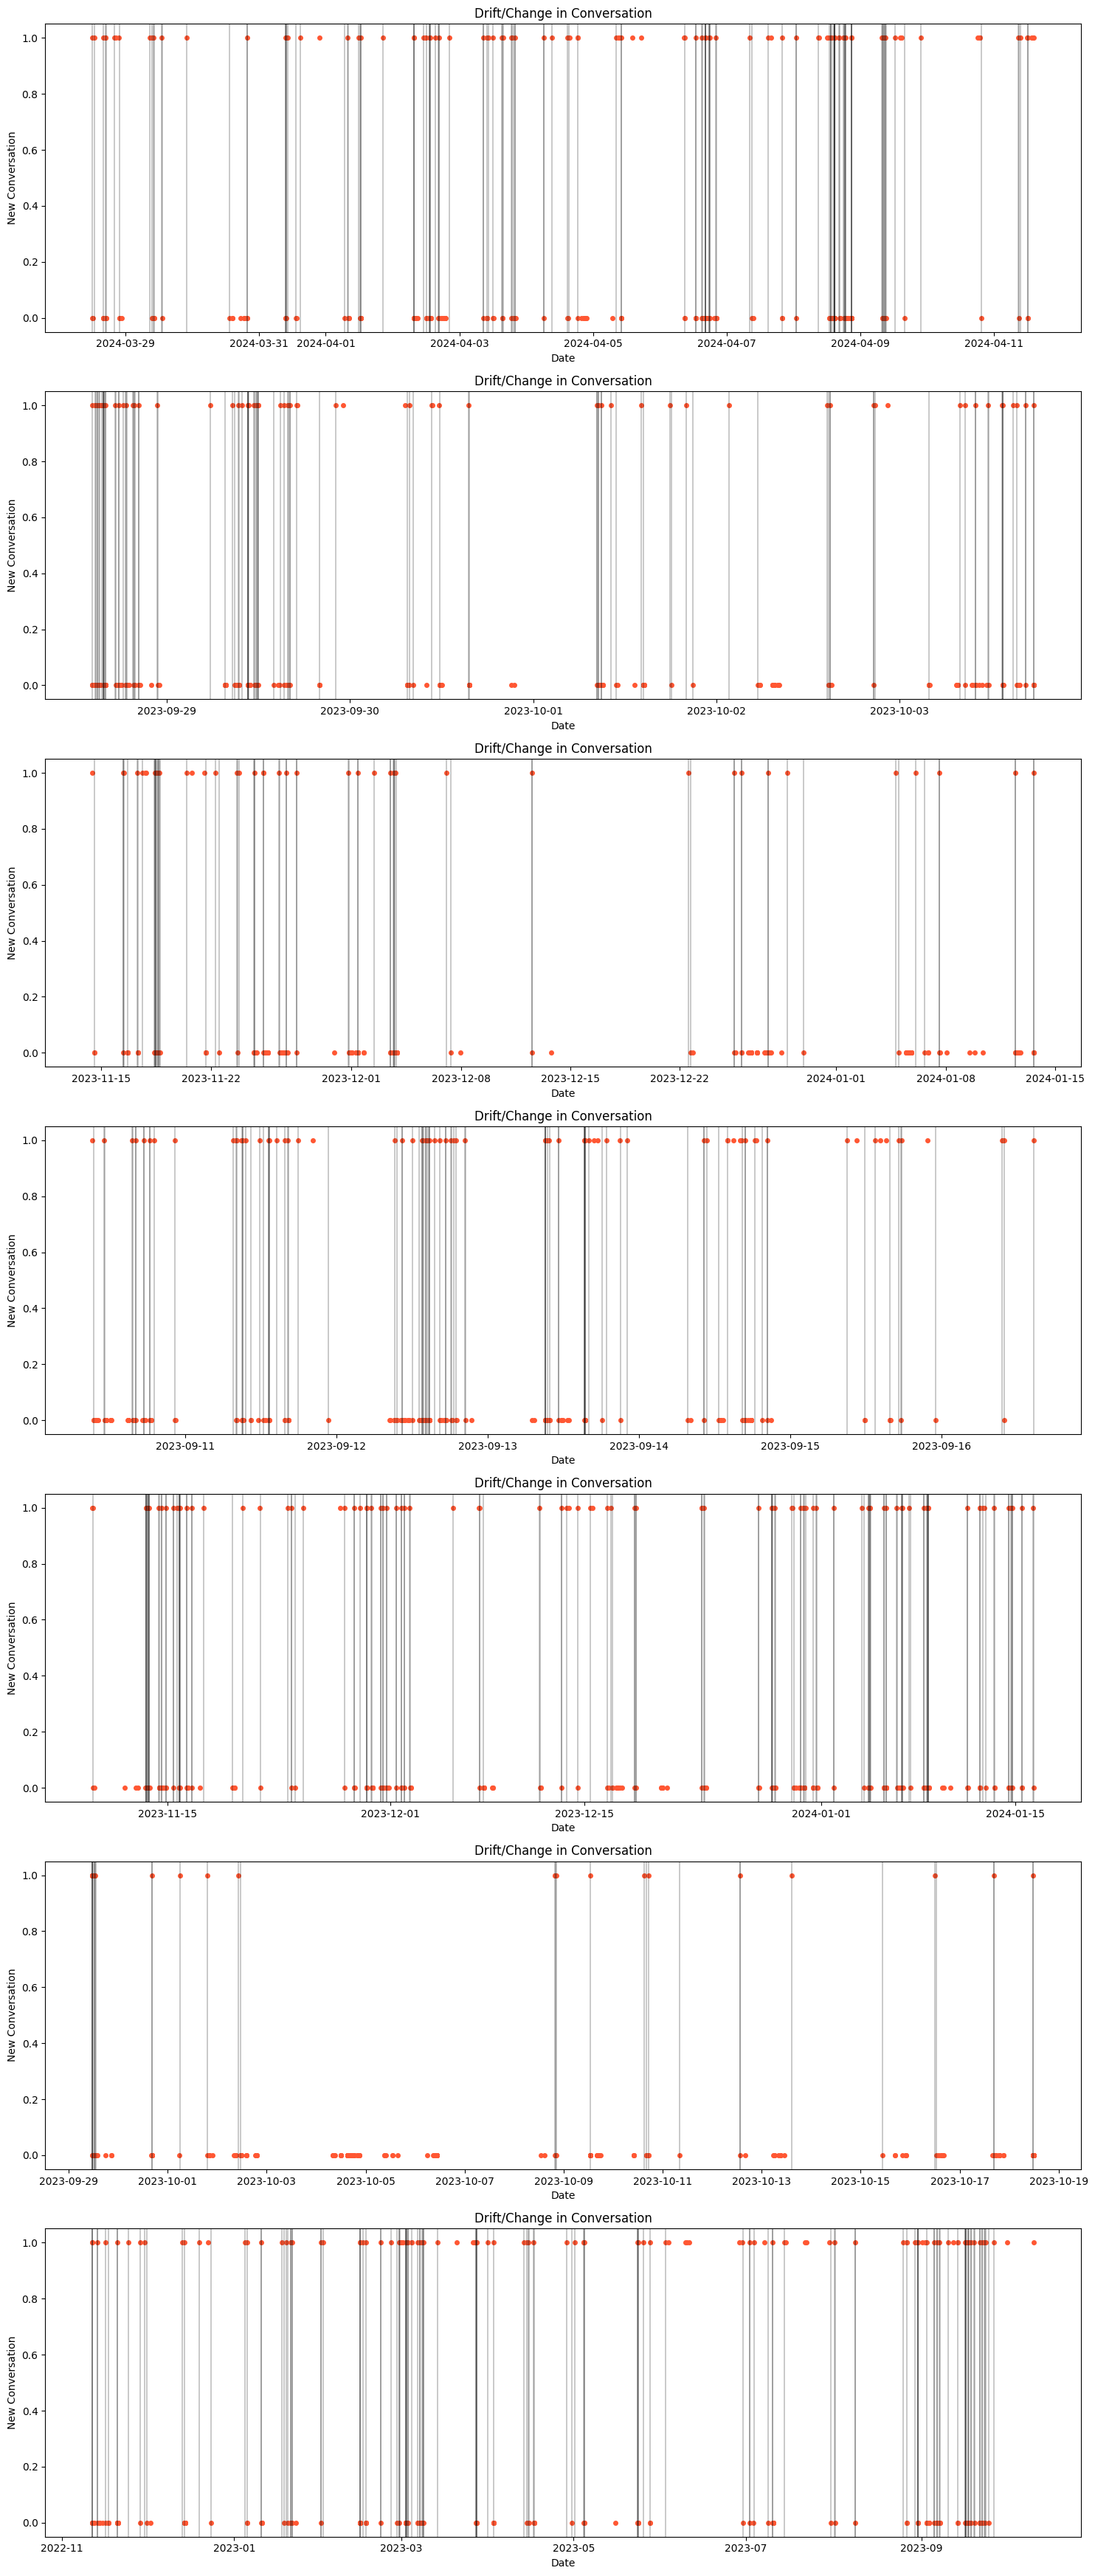

In [44]:
fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5*num_plots))

grouped = df.groupby('group')
num_plots = len(grouped)
drifts = []

for i, (group, group_data) in enumerate(grouped):
    n_drift = 0
    new_conversation = group_data['new_conversation'] == 'yes'
    axes[i].scatter(group_data['date'], new_conversation, label=group, marker='.',linewidth = 2, color='#FF5733')

    prev_status = None
    for date, status in zip(group_data['date'], new_conversation):
        if prev_status is not None and status != prev_status:
            axes[i].axvline(x=date, color='black', linestyle='-', linewidth=0.3)
            n_drift += 1
        prev_status = status

    axes[i].set_title(f'Drift/Change in Conversation')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('New Conversation')

    drifts.append((n_drift, group))

plt.tight_layout()
plt.show()


Display the drifts occurrence in the Telegram groups.

In [45]:
drifts

[(130, 'https://t.me/PoliGruppo'),
 (107, 'https://t.me/joinchat/FNGD_0n6IpIbjfJBAZsuoA'),
 (73, 'https://t.me/joinchat/OOC4qk2QS1FM37aETHuzWQ'),
 (102, 'https://t.me/joinchat/RL4pXSkXipyuKDmd'),
 (149, 'https://t.me/joinchat/aiAC6RgOjBRkYjhk'),
 (33, 'https://t.me/joinchat/qyxbq_vZ5f4xYzg0'),
 (136, 'https://t.me/joinchat/rLRXuuItcHtkMTVk')]

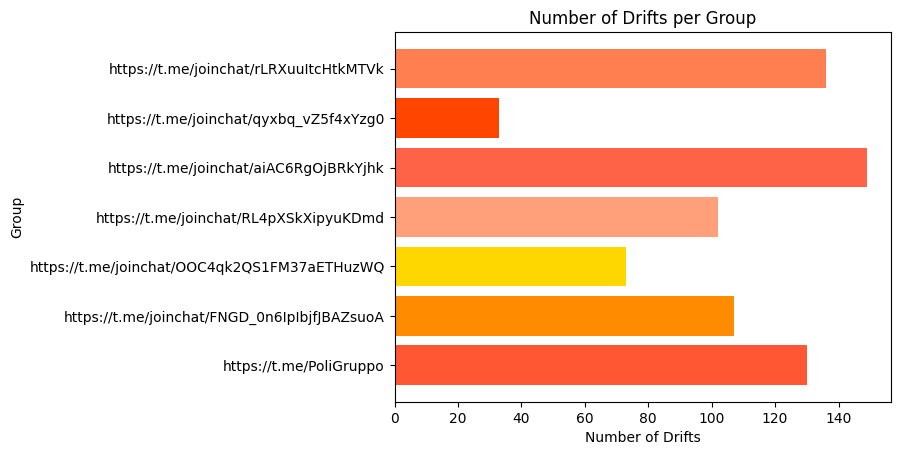

In [46]:
groups = [group for _,group in drifts]
n_drifts = [drifts for drifts,_ in drifts]

colors = ['#FF5733', '#FF8C00', '#FFD700', '#FFA07A', '#FF6347', '#FF4500', '#FF7F50']
plt.barh(groups, n_drifts, color = colors)

plt.xlabel('Number of Drifts')
plt.ylabel('Group')
plt.title('Number of Drifts per Group')

plt.show()